In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings("ignore")

In [4]:
#we are going to create a sample data which can be used for regression
x,y=make_regression(n_features=1,noise=5,n_samples=5000)

The make_regression function is a utility in Python's scikit-learn library (sklearn) that generates a synthetic dataset suitable for regression analysis. Let's break down the parameters used in your example:

n_features=1: This parameter specifies the number of features (independent variables) in the dataset. In this case, n_features=1 means that the dataset will contain only one feature (also known as a predictor or independent variable).

noise=5: This parameter controls the amount of noise (random variation) added to the output. A higher noise value leads to greater variability in the data points. In this case, noise=5 means that random noise with a standard deviation of 5 will be added to the output.

n_samples=5000: This parameter determines the number of samples (data points) in the dataset. In this case, n_samples=5000 means that the dataset will contain 5000 data points.

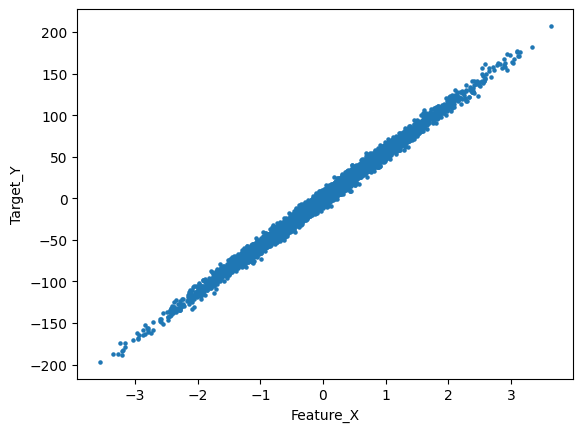

In [5]:
#plot the data using matplotlib.pyplot library.Xlabel and ylabel will give labels to the fig
plt.xlabel("Feature_X")
plt.ylabel("Target_Y")
plt.scatter(x,y,s=5)


In [6]:
#Initialize an instance for linear reg now. Name the variable as linear_model
lm=LinearRegression()

In [7]:
#Fit the linear reg now.The input indep var X and target var Y
lm.fit(x,y)


LinearRegression()

In [9]:
#The model is now trained.Let us have look at the coef for both intercept and the slope of linear reg model
lm.coef_

array([56.23801912])

In [10]:
lm.intercept_

-0.08674117571199824

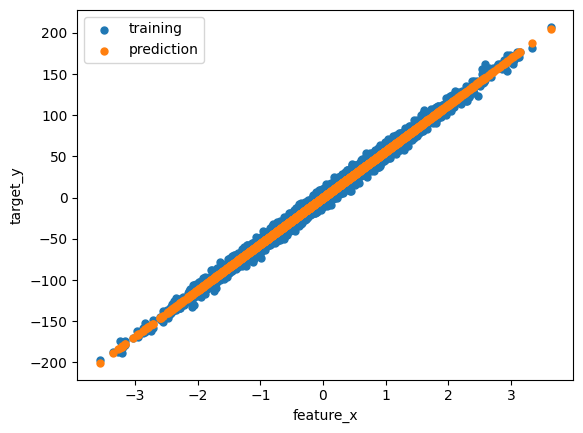

In [13]:
#We can train this model to predict the value using X and then plot it.
pred=lm.predict(x)
plt.scatter(x,y,s=25,label="training")
plt.scatter(x,pred,s=25,label="prediction")
plt.xlabel("feature_x")
plt.ylabel("target_y")
plt.legend()
plt.show()

plt.scatter(x,y,s=25,label="training"): This line creates a scatter plot of the training data points. It plots the feature values (x) on the x-axis and the corresponding target values (y) on the y-axis. Each data point is represented by a marker (circle) with a size (s) of 25. The label parameter is used to specify the label for the training data points in the legend.

In [21]:
df=pd.read_csv("/content/House_data_LR.csv")
df

,Unnamed: 0,sqft_living,price
0,0,1180,221900.0
1,1,2570,538000.0
2,2,770,180000.0
3,3,1960,604000.0
4,4,1680,510000.0
...,...,...,...
21608,21608,1530,360000.0
21609,21609,2310,400000.0
21610,21610,1020,402101.0
21611,21611,1600,400000.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   price        21613 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 506.7 KB


In [23]:
df.isnull().sum()

Unnamed: 0     0
sqft_living    0
price          0
dtype: int64

In [24]:
df.describe()

,Unnamed: 0,sqft_living,price
count,21613.00000,21613.000000,2.161300e+04
mean,10806.00000,2079.899736,5.400881e+05
std,6239.28002,918.440897,3.671272e+05
min,0.00000,290.000000,7.500000e+04
25%,5403.00000,1427.000000,3.219500e+05
50%,10806.00000,1910.000000,4.500000e+05
75%,16209.00000,2550.000000,6.450000e+05
max,21612.00000,13540.000000,7.700000e+06


In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import warnings
warnings.filterwarnings("ignore")

In [28]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


In [31]:
x=df.iloc[:,:1].values
y=df.iloc[:,-1].values

In [34]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.25,random_state=5)
x_train.shape,y_train.shape

((16209, 1), (16209,))

In [35]:
from sklearn.linear_model import LinearRegression

In [38]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
pred

array([742493.91153662, 306315.48636109, 387923.06268425, ...,
       320385.75814095, 773448.50945231, 430133.87802382])

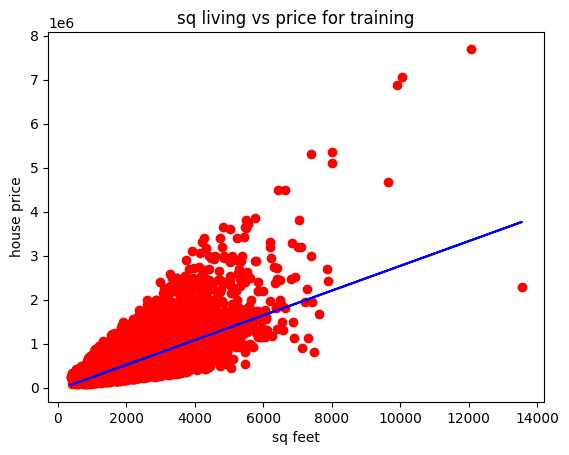

In [39]:
plt.scatter(x_train,y_train,color="r")
plt.plot(x_train,lm.predict(x_train),color="b")
plt.title("sq living vs price for training")
plt.xlabel("sq feet")
plt.ylabel("house price")
plt.show()

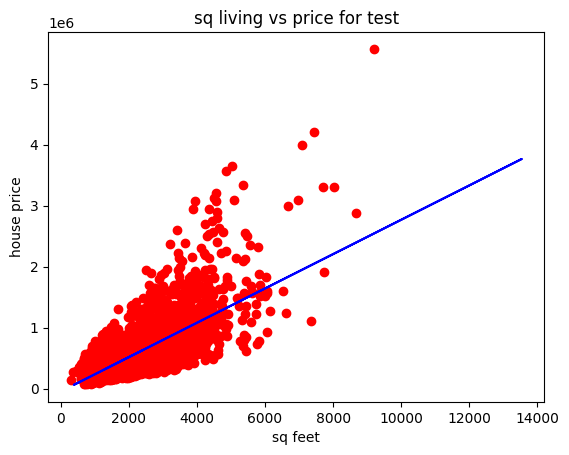

In [41]:
plt.scatter(x_test,y_test,color="r")
plt.plot(x_train,lm.predict(x_train),color="b")
plt.title("sq living vs price for test")
plt.xlabel("sq feet")
plt.ylabel("house price")
plt.show()

In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,pred))
rmse

257125.13804007217

In [46]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,pred)
adj_r2=1-float(len(y)-1)/(len(y)-len(lm.coef_)-1)*(1-r2)
rmse,adj_r2,lm.coef_,lm.intercept_

(257125.13804007217,
 0.5020381653254589,
 array([281.4054356]),
 -45441.30813530844)

In [47]:
#now we will make prediction on unseen value of x
import numpy as np
x_unseen=np.array([1500]).reshape(1,1)
lm.predict(x_unseen)


array([376666.84526037])